# 补充：Python对表格的处理

## 补充1：csv

csv “Comma-Separated Values（逗号分隔的值）”，CSV
文件是简化的电子表格，保存为纯文本文件

CSV 文件是简单的，缺少Excel 电子表格的许多功能。例如，CSV 文件中：
- 值没有类型，所有东西都是字符串；
- 没有字体大小或颜色的设置；
- 没有多个工作表；
- 不能指定单元格的宽度和高度；
- 不能合并单元格；
- 不能嵌入图像或图表。

In [1]:
import csv
with open('./source/csvexample.csv') as exampleReader:
    exampleReader = csv.reader(exampleReader)
    exampleData = list(exampleReader)

reader对象 exampleReader 是迭代器 一次性的 用for迭代比较好 内存占用少

In [13]:
dir(exampleReader)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'dialect',
 'line_num']

In [2]:
exampleData

[['data', 'fruit', 'num'],
 ['4/5/2015 13:34', 'Apples', '73'],
 ['4/5/2015 3:41', 'Cherries', '85'],
 ['4/6/2015 12:46', 'Pears', '14'],
 ['4/8/2015 8:59', 'Oranges', '52'],
 ['4/10/2015 2:07', 'Apples', '152'],
 ['4/10/2015 18:10', 'Bananas', '23'],
 ['4/10/2015 2:40', 'Strawberries', '98']]

In [19]:
list(exampleReader)

ValueError: I/O operation on closed file.

In [41]:
with open('./source/output.csv', 'w', newline='') as outputFile:
    outputWriter = csv.writer(outputFile)
    outputWriter.writerow(['spam', 'eggs', 'bacon', 'ham'])
    outputWriter.writerow(['Hello, world!', 'eggs', 'bacon', 'ham'])

newline和换行符问题  linux:\n    windows:\r\n    mac:\r

csv标准库中的writerow在写入文件时会加入'\r\n'作为换行符，if newline is ''，换行符不会被转化而是直接输出

In [37]:
with open('./source/output.csv','w',newline='') as csvfile:
    writer=csv.writer(csvfile)
    writer.writerow('a')
    writer.writerow('b')

with open('./source/output.csv','r',newline='') as csvfile:
    txtdata=csvfile.read()

txtdata

'a\r\nb\r\n'

当写文件时newline=''，程序写入'a\r\nb\r\n'；读取文件时newline=None，universal newlines mode工作，换行符'\r\n'被翻译为'\n'

In [39]:
with open('./source/output.csv','w',newline='') as csvfile:
    writer=csv.writer(csvfile)
    writer.writerow('a')
    writer.writerow('b')

with open('./source/output.csv','r') as csvfile:
    txtdata=csvfile.read()

txtdata

'a\nb\n'

当写文件时newline=None，csv先是将'a\r\nb\r\n'写入内存，再写入文件时，universal newlines mode工作，换行符'\n'被翻译为'\r\n'

In [38]:
with open('./source/output.csv','w') as csvfile:
    writer=csv.writer(csvfile)
    writer.writerow('a')
    writer.writerow('b')

with open('./source/output.csv','r',newline='') as csvfile:
    txtdata=csvfile.read()

txtdata

'a\r\r\nb\r\r\n'

当写文件时newline=None，csv先是将'a\r\nb\r\n'写入内存，再写入文件时，universal newlines mode工作，换行符'\n'被翻译为'\r\n'；读取文件时newline=None，universal newlines mode工作，换行符'\r'和'\r\n'被翻译为'\n'，显示为'a\n\nb\n\n'

In [40]:
with open('./source/output.csv','w') as csvfile:
    writer=csv.writer(csvfile)
    writer.writerow('a')
    writer.writerow('b')

with open('./source/output.csv','r') as csvfile:
    txtdata=csvfile.read()

txtdata

'a\n\nb\n\n'

## 补充2：excel

In [3]:
import os
from openpyxl import Workbook as wb

https://openpyxl.readthedocs.io/en/stable/

# Python实用数据类型

## 内置array

python 内置的array.array 只能存放一维数组 要规定数据类型 且只能一种类型存储  

实际上list和array底层都是c的动态数组（cpython解释器） list存放的是对象引用 array存放的是固定类型数据

![array](./pic/array.png)

In [13]:
from array import array
myarray1 = array("i", [1,2,3,4])
myarray2 = array("u", ["a", "b", "c"])
myarray3 = array("i",[i for i in range(10**5)])

In [6]:
myarray1

array('i', [1, 2, 3, 4])

In [11]:
import sys

In [14]:
sys.getsizeof(myarray3)

400064

In [15]:
sys.getsizeof([i for i in range(10**5)])

824456

可以明显观察到内存占用的多少  
但是array的局限和也c一样   
不能像list存储多种不同的类型  
不能存储超过c类型大小的数据

In [16]:
myarray1 = array("i", [10000000000000000000000000000000000000000,2,3,4])

OverflowError: Python int too large to convert to C long

常用方法和list看齐  

    append() -- append a new item to the end of the array
    buffer_info() -- return information giving the current memory info
    byteswap() -- byteswap all the items of the array
    count() -- return number of occurrences of an object
    extend() -- extend array by appending multiple elements from an iterable
    fromfile() -- read items from a file object
    fromlist() -- append items from the list
    frombytes() -- append items from the string
    index() -- return index of first occurrence of an object
    insert() -- insert a new item into the array at a provided position
    pop() -- remove and return item (default last)
    remove() -- remove first occurrence of an object
    reverse() -- reverse the order of the items in the array
    tofile() -- write all items to a file object
    tolist() -- return the array converted to an ordinary list
    tobytes() -- return the array converted to a string

## numpy
    * numpy的array类型扩充了python内置的array类型
    * 内置的array就是存储用的 但是numpy支持很多数学张量运算

### array基础

#### 张量概念解释

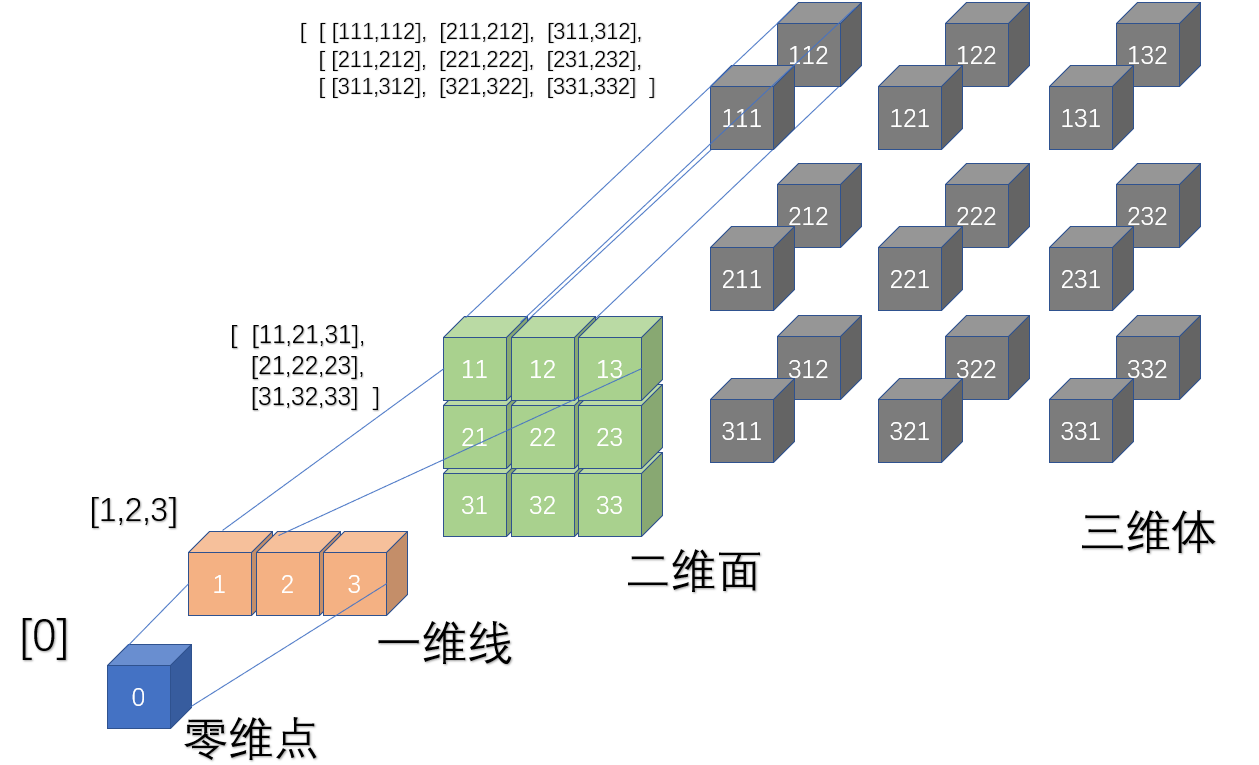

#### The Basics属性

In [5]:
import numpy as np
import random

In [10]:
a = np.arange(15).reshape(3, 5)

reshape必须保证size不变 否则就不能重塑形状

In [7]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [8]:
a = np.arange(15).reshape(15,1)
a

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14]])

单操作：索引

In [11]:
a[1,3]  # 用逗号区别不同的axis

8

In [12]:
a[1][3] # 还可以这么写 因为实际上第n个维度存的是第n+1维度的list 

8

In [676]:
a[[1,2,1],[2,2,2,]] #x坐标和y坐标分别写两个list

array([ 7, 12,  7])

In [678]:
a[(1,2),(2,2),(1,2)] # 这种直观按照坐标点来写 是不得行的

IndexError: too many indices for array

多操作：切片

In [10]:
a[:-1,3] #切片返回的是拷贝   还是左闭右开 

array([3, 8])

In [14]:
a[:-1] #在第一维度上直接切片

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

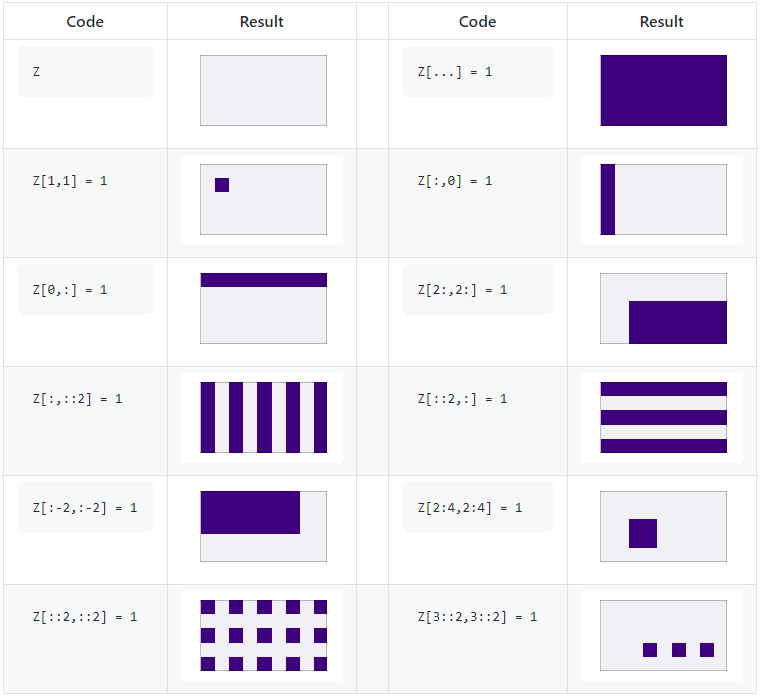

迭代 就和迭代list一样一样的

In [255]:
for i in a:
    print(i)

[0 1 2 3 4]
[5 6 7 8 9]
[10 11 12 13 14]


形状

In [17]:
a.shape

(3, 5)

维度

In [18]:
a.ndim 

2

元素数

In [22]:
a.size

15

元素类型

In [29]:
a.dtype.name

'int32'

元素占据空间（byte） int32就是32bit=4byte 

In [20]:
a.itemsize

4

In [24]:
type(a)

numpy.ndarray

数据存在a对象的data属性中,但是实际上我们都不用data直接访问数据

In [33]:
a.data[0,0]

0

#### Data type数据类型

![type](./pic/numpytype.png)

int8 int32 float32 可以直接看出数据类型的长度 比int float的无限精度实用

In [79]:
dt = np.dtype(np.int32)  # dtype是个类 他的实例的__str__方法 print就是int32
print(dt)

int32


In [80]:
dt = np.dtype('i4')  # dtype是个类 他的实例的__str__方法 print就是int32
print(dt)

int32


In [81]:
dt = np.dtype('f2')  # dtype是个类 他的实例的__str__方法 print就是int32
print(dt)

float16


In [83]:
dt = np.dtype('a4')  # dtype是个类 他的实例的__str__方法 print就是int32
print(dt)

|S4


https://www.runoob.com/numpy/numpy-dtype.html

### array创建

####  基础构建

自动推断类型 经常会取比较长的类型适配不同情况 np.array接受一个list作为参数  
注意不要写成np.array(1,2,3,4) 这样是四个参数

In [13]:
a = np.array([2,3,4])
a.dtype

dtype('int32')

In [14]:
a

array([2, 3, 4])

numpy的array有tolist方法 可以变回去list  
使用list()强转也可以

In [704]:
a.tolist()

[2, 3, 4]

In [707]:
list(a)

[2, 3, 4]

In [36]:
b = np.array([1.2, 3.5, 5.1])
b.dtype

dtype('float64')

强制规定类型 要使用np.float23等numpy类型

In [38]:
a = np.array([2,3,4],dtype=np.float32)
a.dtype

dtype('float32')

In [39]:
a

array([2., 3., 4.], dtype=float32)

二维矩阵构建

In [41]:
b = np.array([(1.5,2,3), (4,5,6)])
b

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

In [42]:
b.shape

(2, 3)

中间的构造方法其实很灵活 不一定非得要list tuple也行

In [44]:
b = np.array([[1.5,2,3], [4,5,6]])
b

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

In [46]:
a = np.array((1,2,3,4))
a

array([1, 2, 3, 4])

往往需要预先设定一些array 防止动态的创建或者增减 那些都是昂贵的操作

#### 已知shape构建

零张量

In [50]:
a = np.zeros((3, 4))
a.dtype

dtype('float64')

创建纯零张量为什么默认是float64？而不是整型？  
因为现实场景使用往往是归一化的 -1到1之间的小数

In [51]:
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

当然也可以制定dtype

In [52]:
np.ones( (2,3,4), dtype=np.int16 )

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

空张量  
空张量分配了内存但是没有赋值  
多次分配python会记住 不会一直给随机值 不要有大胆的想法用empty做随机值……

In [17]:
a = np.empty( (2,4) )
a

array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 6.24498976e-321, 8.45590538e-307,
        1.42410974e-306]])

one张量

In [82]:
np.ones((5), dtype=int)

array([1, 1, 1, 1, 1])

In [83]:
np.ones((2, 1))

array([[1.],
       [1.]])

eye张量 对角矩阵

In [85]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [87]:
help(np.eye)

Help on function eye in module numpy:

eye(N, M=None, k=0, dtype=<class 'float'>, order='C')
    Return a 2-D array with ones on the diagonal and zeros elsewhere.
    
    Parameters
    ----------
    N : int
      Number of rows in the output.
    M : int, optional
      Number of columns in the output. If None, defaults to `N`.
    k : int, optional
      Index of the diagonal: 0 (the default) refers to the main diagonal,
      a positive value refers to an upper diagonal, and a negative value
      to a lower diagonal.
    dtype : data-type, optional
      Data-type of the returned array.
    order : {'C', 'F'}, optional
        Whether the output should be stored in row-major (C-style) or
        column-major (Fortran-style) order in memory.
    
        .. versionadded:: 1.14.0
    
    Returns
    -------
    I : ndarray of shape (N,M)
      An array where all elements are equal to zero, except for the `k`-th
      diagonal, whose values are equal to one.
    
    See Also
    -

full张量 填充

In [417]:
np.full((3,4),3.14,dtype=np.float16)

array([[3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14]], dtype=float16)

#### 抄袭张量构建

like系列  zero_like empty_like ones_like full_like

In [411]:
a = np.arange(15).reshape(3, 5)

In [18]:
np.zeros_like(a)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [19]:
np.ones_like(a)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

注意：填充时候 值会被原array的类型所束缚

In [413]:
np.full_like(a,3.14)

array([[3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3]])

In [415]:
np.full_like(a,3.14,dtype=np.float16)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]], dtype=float16)

In [20]:
np.empty_like(a)

array([[      0,       0,       0,       0,       0],
       [      0,       0,       0,       0,       0],
       [   1276,       0,       0, 7471207,       0]])

#### arange和linspace  


1. arange< [start end) step >
2. linspace<  [start end)  number >

arange类同于python基础的range

In [69]:
np.arange( 10, 30, 5 )  # start end+1 step 左闭右开

array([10, 15, 20, 25])

In [70]:
np.arange( 0, 2, 0.3 )

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

linspace不同于arange 第三个参数不是step 而是元素数 把一二参数规定的范围线性均匀的切分成多少个

In [74]:
np.linspace( 0, 2, 9 )

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

linspace的主要作用是制作x轴坐标

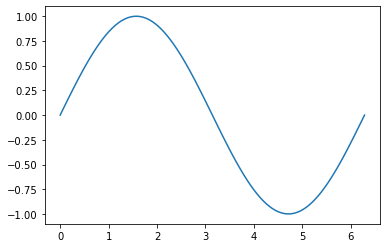

In [18]:
from matplotlib import pyplot as plt 

x = np.linspace( 0, 2*np.pi, 100 ) 
f = np.sin(x)

plt.plot(x,f) 
plt.show()

In [19]:
x

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

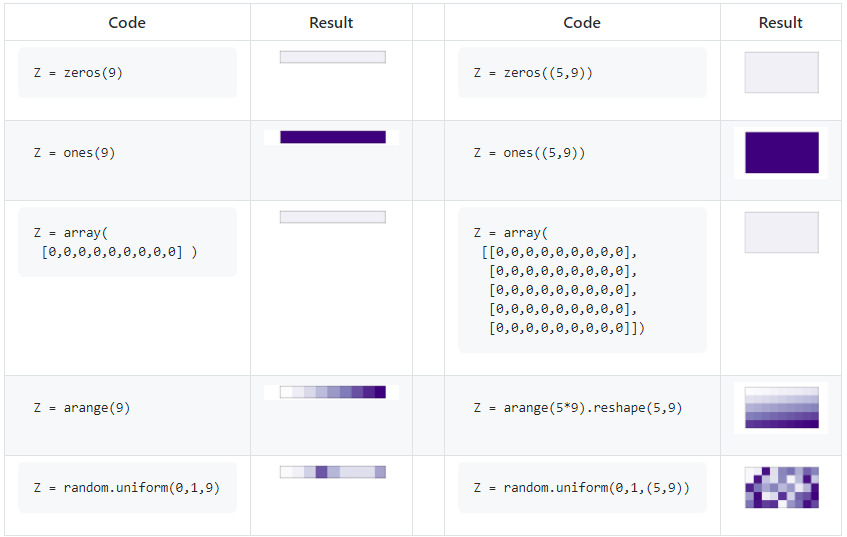

### 补充3：python内置随机数模块
https://docs.python.org/zh-cn/3.7/library/random.html

In [20]:
import random

#### 伪随机种子

基础伪随机数 [0,1)

In [28]:
random.random()    # Random float:  0.0 <= x < 1.0

0.592379244538097

啥叫伪随机 随机种子不设定的时候默认是系统时间  
设定了seed之后 随机数就固定了

In [34]:
random.seed(10)
random.random()

0.5714025946899135

注意：

随机种子什么时候管用？  
想要获取一个固定的随机序列时候管用  

In [35]:
random.seed(10)

In [50]:
random.seed(10)    # 注释和不注释 作用不一样 注意区分
for i in range(10):
    print(random.random())

0.5714025946899135
0.4288890546751146
0.5780913011344704
0.20609823213950174
0.81332125135732
0.8235888725334455
0.6534725339011758
0.16022955651881965
0.5206693596399246
0.32777281162209315


控制bit数 返回随机数  
主要用在操作内存和比特流

In [201]:
random.getrandbits(1)

1

In [58]:
random.getrandbits(8)

107

随机整数 左右闭

In [68]:
random.randint(8,10)

8

#### 范围内随机

[a,b]整数  注意这里左闭右闭了

In [42]:
for i in range(100):
    print(random.randint(2, 10),end=' ')

4 8 9 5 10 6 10 9 9 3 4 9 9 8 4 8 10 7 10 8 9 4 10 9 3 8 2 2 9 10 3 2 7 3 4 3 9 9 4 9 8 10 9 7 6 9 8 7 10 10 4 5 7 2 5 9 2 3 6 8 5 6 3 2 10 3 6 4 9 4 7 8 5 7 4 3 5 8 5 3 6 9 10 8 9 10 5 6 7 3 2 5 8 8 8 5 3 8 3 2 

[a,b]小数  左闭右闭貌似也没啥意义了 为啥？

In [44]:
for i in range(20):
    print(random.uniform(2, 10),end=' ')      # Random float:  2.0 <= x < 10.0

9.650774893154546 3.7865502863849425 6.639984141394093 2.797140457402832 6.516469619301665 8.687769841288151 4.421078917228272 8.80248534934338 5.166465675715186 8.107420589254435 2.621929666122072 8.076322984393297 5.933325002360903 3.3470204714314553 8.470771238347638 9.70642611195008 9.52876143320299 4.626009695450207 2.2985845907393827 8.666898303011163 

random.randrange(stop)  
random.randrange(start, stop[, step])

其实相当于下面讲的choice(range(start, stop, step))

#### 容器随机

choice随机选取

In [45]:
seq = [i for i in range(100)]

for i in range(100):
    print(random.choice(seq),end=' ')

22 74 90 53 19 65 82 89 50 12 50 15 30 13 54 92 81 39 92 37 68 83 12 44 66 79 60 77 31 68 37 1 85 20 86 49 88 29 12 65 81 97 60 12 73 51 74 27 36 45 8 24 79 71 67 3 9 51 4 2 83 55 43 22 93 6 45 41 80 60 21 2 26 16 37 25 31 31 49 78 69 74 76 53 70 97 3 16 0 15 3 7 87 98 98 22 15 88 49 8 

shuffle洗牌

In [75]:
seq = [i for i in range(5)]
# random.seed(10)
random.shuffle(seq)
seq

[3, 1, 0, 4, 2]

sample抽样

In [102]:
random.sample(range(10000000), k=10)

[5081157,
 8998378,
 6142903,
 4029589,
 5274149,
 9210392,
 7560199,
 7315385,
 7884854,
 1090421]

#### 概率统计

1. 高斯分布随机值  random.gauss(mu, sigma) 

In [171]:
random.gauss(0, 10)

1.3724384004570955

补充：python的取整  
    1. math.ceil()
    2. round()
    3. math.floor()
    4. int()
    5. //


In [69]:
boxes = np.zeros(41)
for i in range(10**6):
    tmp = random.gauss(0, 10)
    tmp = round(tmp)+20
    if 0 <= tmp <= 40:
        boxes[tmp]+=1

boxes

array([ 5400.,  6383.,  7850.,  9435., 11014., 12769., 15053., 17152.,
       19277., 21944., 24183., 26564., 28841., 31547., 33366., 35204.,
       36920., 37935., 39427., 39672., 40055., 39322., 39242., 38208.,
       36856., 35251., 33095., 31415., 28722., 26518., 24457., 21776.,
       19335., 17368., 14865., 12934., 11021.,  9387.,  7859.,  6534.,
        5291.])

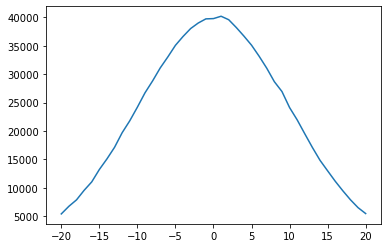

In [177]:
from matplotlib import pyplot as plt 

x = np.linspace( -20, 20, 41 ) 
g = boxes

plt.plot(x,g) 
plt.show()

2. 蒙特卡洛方法  
    * -1 +1的一个面积为4的正方形  
    * 随机扔飞镖打在(x,y)点上  
    * 如果x y平方和大于1就是出了半径为1的内接圆
    * hit_num / 10^5  = pi * r^2 /4


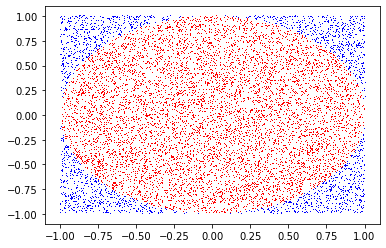

314.64

In [214]:
from matplotlib import pyplot as plt 

hit_num = 0
for i in range(10**4):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    tmp = x**2 + y**2
    if tmp<1:
        hit_num += 1
        plt.plot(x,y,'r,') 
    else:
        plt.plot(x,y,'b,') 
    

plt.show()



In [215]:
pi = 4*hit_num/(10**4)
pi

3.1464

好使是好使 收敛太慢了

#### 随机加密  
random的伪随机模块只适合用来做数学仿真  
secrets才是加密和安全使用的随机模块 https://docs.python.org/zh-cn/3.7/library/secrets.html#module-secrets

* 产生随机密码

In [236]:
import string   
import secrets
alphabet = string.ascii_letters + string.digits

In [240]:
''.join(secrets.choice(alphabet) for i in range(8))

'mWf98L3B'

要求生成长度为十个字符的字母数字密码，其中包含至少一个小写字母，至少一个大写字母以及至少三个数字

In [235]:
while True:
    password = ''.join(secrets.choice(alphabet) for i in range(10))
    if (any(c.islower() for c in password)
        and any(c.isupper() for c in password)
        and sum(c.isdigit() for c in password) >= 3):
        break
password

'Zka8aB6o3Q'

In [241]:
type(c.islower() for c in password)

generator

注意any的用法 里面是个可迭代的生成器 有任何就是真

生成随机字节流

In [245]:
secrets.token_bytes(16)  

b'<\xe7\xf6\xb1\xb06\xbaW\xe6\x0bT0\xd2Y\xe6\x12'

生成url的安全随机码

In [246]:
secrets.token_urlsafe(16)

'9U3WmUlSDj3JjwuZomh1xQ'

### 补充4：numpy的随机  
numpy里面还有一个random，用来生成随机array  
请注意和内置random的区别

#### 种子是独立的

In [359]:
np.random.seed(10)

#### 随机小数array

* random rand

元素是零到一的随机array 需要一个元组作为size参数

In [261]:
np.random.random((4,5))

array([[0.11461873, 0.89693273, 0.98852532, 0.66894359, 0.66798248],
       [0.62781554, 0.67970268, 0.90137908, 0.25018255, 0.35007699],
       [0.15168044, 0.98612955, 0.552475  , 0.26855394, 0.36081176],
       [0.05940929, 0.31599216, 0.79576815, 0.0604324 , 0.62442987]])

In [278]:
help(np.random.random)

Help on built-in function random:

random(...) method of numpy.random.mtrand.RandomState instance
    random(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0). Alias for
    `random_sample` to ease forward-porting to the new random API.



rand比较简单易用 不是输入元组作为size 而是直接写参数

In [277]:
np.random.rand(4,5)

array([[0.9466487 , 0.07442058, 0.14955934, 0.89952109, 0.52643103],
       [0.27884829, 0.8909968 , 0.91088632, 0.35870158, 0.52959166],
       [0.80021763, 0.08179037, 0.85027466, 0.72537911, 0.59128096],
       [0.97902916, 0.03987475, 0.69398424, 0.19676339, 0.75186776]])

小心别认错了 randn是标准正态分布

In [9]:
np.random.randn(4,5)

array([[ 1.02449581, -0.70430248, -0.04278297,  2.11107648, -1.57048347],
       [ 0.55173873,  0.42955071, -1.03643199,  0.18195447,  1.89030824],
       [-0.64088195, -0.70683659, -1.00067154,  0.9265193 , -0.56291889],
       [ 1.12955901, -1.46587713, -0.2839773 , -1.09956062,  0.66568469]])

In [279]:
help(np.random.rand)

Help on built-in function rand:

rand(...) method of numpy.random.mtrand.RandomState instance
    rand(d0, d1, ..., dn)
    
    Random values in a given shape.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `random_sample`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    Create an array of the given shape and populate it with
    random samples from a uniform distribution
    over ``[0, 1)``.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, must be non-negative.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
    out : ndarray, shape ``(d0, d1, ..., dn)``
        Random values.
    
    See Also
    --------
    random
    
    Examples
    --------
    >>> np.random.rand(3,2)
    arra

* uniform

low到high的随机array

In [274]:
np.random.uniform(low=3,high=4,size=(4,5))

array([[3.12797203, 3.74255159, 3.14995883, 3.31665597, 3.2160796 ],
       [3.66983491, 3.30266529, 3.56613334, 3.11210233, 3.45137218],
       [3.45668533, 3.08943839, 3.04460963, 3.28648235, 3.90043634],
       [3.59082589, 3.12819034, 3.90680191, 3.4523125 , 3.92221673]])

默认元素是零到一

In [273]:
np.random.uniform(size=(4,5))

array([[0.15962343, 0.94459531, 0.2883974 , 0.4297616 , 0.08109943],
       [0.75106789, 0.47004532, 0.43239418, 0.89542884, 0.03925445],
       [0.12292436, 0.47696719, 0.33038699, 0.7473828 , 0.98107646],
       [0.6738212 , 0.37545189, 0.18284911, 0.7342553 , 0.0580518 ]])

不写size就和random的uniform一样了

In [275]:
np.random.uniform(4,5)

4.302653667970259

#### 随机整数array
* randint
    1. 三个参数 low high size   [low, high)
    2. 只写一个参数 就是[0,low)

In [348]:
random.randint(8)  # 内置random不能只写一个参数

TypeError: randint() missing 1 required positional argument: 'b'

In [347]:
np.random.randint(2)

0

In [369]:
np.random.randint(2,8)

2

In [354]:
a = np.random.randint(2,8,(4,3))
a

array([[2, 6, 7],
       [2, 3, 2],
       [2, 5, 3],
       [5, 4, 5]])

In [355]:
a.dtype

dtype('int32')

In [353]:
np.random.randint(8, size=(2,2,3), dtype='int64')

array([[[2, 6, 3],
        [7, 5, 1]],

       [[0, 1, 0],
        [2, 1, 4]]], dtype=int64)

* random_integers
    1. 区别是 [low, high]
    2. 这个函数该取消了 认识就行

In [371]:
np.random.random_integers(4, 5, size=(2,2))

<ipython-input-371-cf1cb5af9a2f>:1: DeprecationWarning: This function is deprecated. Please call randint(4, 5 + 1) instead
  np.random.random_integers(4, 5, size=(2,2))


array([[5, 5],
       [4, 4]])

#### 随机抽取

In [372]:
random.choice(5)

TypeError: object of type 'int' has no len()

numpy的choice可以简写 数字参数相当于range(5)

In [373]:
np.random.choice(5)

1

numpy.random.choice(a, size=None, replace=True, p=None)  
 从a（数组）中选取size（维度）大小的随机数，replace=True表示可重复抽取，p是a中每个数出现的概率

In [385]:
np.random.choice(6, (2,3), False,p=[0.1,0.1,0.1,0.1,0.1,0.5])

array([[5, 1, 3],
       [4, 2, 0]])

#### 打乱

复制之后打乱permutation

In [409]:
a = range(5)
b = np.random.permutation(a)
print(list(a))
print(b)

[0, 1, 2, 3, 4]
[4 2 3 0 1]


直接打乱本体shuffle

In [410]:
b=list(range(5))
print(b)
np.random.shuffle(b)
print(b)

[0, 1, 2, 3, 4]
[4, 1, 3, 2, 0]


### array变形

#### reshape改形状 重塑

reshape就是按行 按直觉折叠

In [248]:
np.arange(10000)

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [249]:
np.arange(10000).reshape(100,100)

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

reshape不能增减原有array的元素个数

In [250]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [251]:
np.arange(15).reshape(4,4)

ValueError: cannot reshape array of size 15 into shape (4,4)

In [252]:
np.arange(15).reshape(5,3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

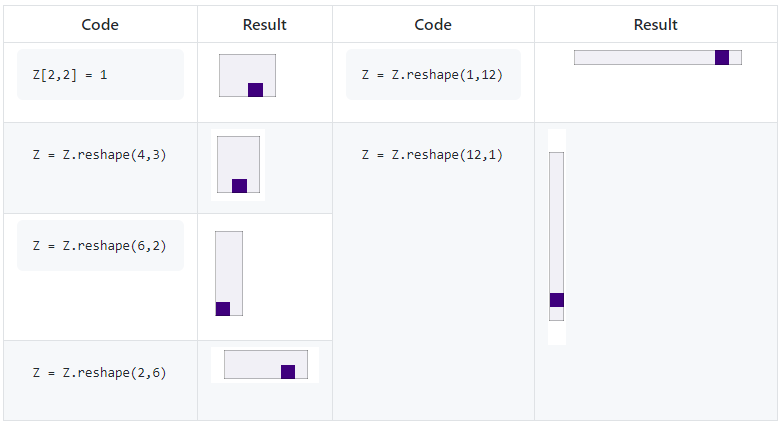

In [356]:
a = np.floor(10*np.random.random((3,4)))

In [357]:
a

array([[4., 6., 5., 6.],
       [1., 9., 1., 3.],
       [3., 9., 2., 0.]])

重塑有个关键的方法 留一个默认参数用于自动推断 -1只能有一个 不能写俩就猜不住来了

In [483]:
a = np.arange(16).reshape(2,2,-1)
a.shape

(2, 2, 4)

#### resize改大小

resize
1. resize原尺寸：不会改变原格式数据
2. resize不等于原尺寸：按照原数据从左往右顺序，从上往下，Z字型填充，缺失部分填充值为0。  
不会改变原格式数据(直接resize会报错，需添加 refcheck=False)

In [528]:
a = np.array([[1, 2, 3], [3, 4, 5], [5, 6, 7]])
a

array([[1, 2, 3],
       [3, 4, 5],
       [5, 6, 7]])

In [525]:
a.resize(3, 3)
a

array([[1, 2, 3],
       [3, 4, 5],
       [5, 6, 7]])

In [526]:
a.resize((2, 2),refcheck=False)
a

array([[1, 2],
       [3, 3]])

In [530]:
a.resize((4, 3),refcheck=False)
a

array([[1, 2, 3],
       [3, 4, 5],
       [5, 6, 7],
       [0, 0, 0]])

In [531]:
a.resize((4, 4),refcheck=False)
a

array([[1, 2, 3, 3],
       [4, 5, 5, 6],
       [7, 0, 0, 0],
       [0, 0, 0, 0]])

注意：  
某些机器学习框架的resize和numpy的resize在尺寸变大时的补充值有区别  
常常是线性插值而不是类似于numpy的补零 

#### transpose转置

In [533]:
a = np.arange(24).reshape(2,3,4)
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [534]:
a = np.transpose(a,(2,0,1))
a

array([[[ 0,  4,  8],
        [12, 16, 20]],

       [[ 1,  5,  9],
        [13, 17, 21]],

       [[ 2,  6, 10],
        [14, 18, 22]],

       [[ 3,  7, 11],
        [15, 19, 23]]])

In [535]:
a.shape

(4, 2, 3)

In [546]:
a

array([[[ 0,  4,  8],
        [12, 16, 20]],

       [[ 1,  5,  9],
        [13, 17, 21]],

       [[ 2,  6, 10],
        [14, 18, 22]],

       [[ 3,  7, 11],
        [15, 19, 23]]])

In [547]:
a.T.shape

(3, 2, 4)

T方法也能直接转置 对于矩阵很直观 但是多维array的时候小心使用

In [548]:
a = np.array([[1,2],[3,4],[5,6]])
a

array([[1, 2],
       [3, 4],
       [5, 6]])

In [553]:
a.T

array([[1, 3, 5],
       [2, 4, 6]])

#### ravel flatten摊平

摊平array ravel

In [554]:
a = np.array([[1, 2, 3], [4, 5, 6]])
np.ravel(a)

array([1, 2, 3, 4, 5, 6])

有个摊平顺序的问题 参考文档https://numpy.org/doc/stable/reference/generated/numpy.ravel.html#numpy.ravel

array的flatten方法也可以

In [581]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a.flatten()

array([1, 2, 3, 4, 5, 6])

#### concat轴连接
1. hstack  column_stack 水平堆叠 列连接
2. vstack  row_stack 垂直堆叠 行连接
3. concatenate 通用连接

In [557]:
a = np.random.randint(0,9,(3,4))
a

array([[0, 2, 2, 0],
       [5, 8, 0, 5],
       [3, 6, 7, 8]])

In [558]:
b = np.random.randint(0,9,(3,4))
b

array([[0, 6, 0, 1],
       [0, 1, 4, 0],
       [1, 7, 3, 0]])

In [564]:
c = np.vstack((a,b))

In [565]:
c.shape

(6, 4)

In [566]:
d = np.hstack((a,b))

In [568]:
d.shape

(3, 8)

通用连接

In [569]:
np.concatenate((a, b), axis=0)  #vstack row_stack 垂直堆叠 行连接

array([[0, 2, 2, 0],
       [5, 8, 0, 5],
       [3, 6, 7, 8],
       [0, 6, 0, 1],
       [0, 1, 4, 0],
       [1, 7, 3, 0]])

In [570]:
np.concatenate((a, b), axis=1)  #hstack column_stack 水平堆叠 列连接

array([[0, 2, 2, 0, 0, 6, 0, 1],
       [5, 8, 0, 5, 0, 1, 4, 0],
       [3, 6, 7, 8, 1, 7, 3, 0]])

In [572]:
np.concatenate((a, b), axis=None)  #摊平连接

array([0, 2, 2, 0, 5, 8, 0, 5, 3, 6, 7, 8, 0, 6, 0, 1, 0, 1, 4, 0, 1, 7,
       3, 0])

In [573]:
np.concatenate((a, b))  #默认axis=0

array([[0, 2, 2, 0],
       [5, 8, 0, 5],
       [3, 6, 7, 8],
       [0, 6, 0, 1],
       [0, 1, 4, 0],
       [1, 7, 3, 0]])

In [574]:
a = np.random.randint(0,9,(3,4,5))
b = np.random.randint(0,9,(3,4,5))

In [577]:
res = np.concatenate((a, b),2)  # 在第三个轴连接 也就是5那个轴
res

array([[[8, 1, 5, 4, 5, 1, 6, 7, 1, 7],
        [4, 3, 4, 4, 1, 1, 2, 2, 7, 4],
        [1, 2, 1, 1, 2, 6, 7, 3, 2, 3],
        [2, 2, 5, 8, 1, 2, 5, 0, 7, 2]],

       [[7, 1, 7, 1, 8, 6, 5, 7, 3, 7],
        [0, 6, 7, 5, 1, 0, 3, 6, 0, 7],
        [2, 6, 1, 5, 8, 2, 5, 1, 0, 2],
        [0, 3, 6, 3, 0, 3, 1, 4, 2, 0]],

       [[2, 8, 8, 0, 7, 2, 8, 8, 8, 6],
        [7, 4, 6, 3, 4, 5, 8, 8, 8, 0],
        [5, 3, 5, 2, 3, 6, 1, 2, 8, 3],
        [2, 2, 5, 8, 4, 8, 6, 7, 5, 1]]])

In [578]:
res.shape

(3, 4, 10)

#### split拆分

In [589]:
a = np.random.randint(0,9,(8,8))
a

array([[8, 6, 8, 4, 7, 2, 6, 6],
       [5, 7, 1, 1, 3, 1, 7, 4],
       [6, 8, 2, 6, 6, 1, 6, 8],
       [6, 3, 8, 7, 2, 7, 1, 8],
       [4, 7, 4, 3, 6, 7, 4, 7],
       [5, 2, 1, 3, 2, 0, 4, 7],
       [2, 8, 0, 2, 7, 0, 4, 0],
       [5, 6, 4, 0, 1, 5, 8, 7]])

垂直水平切分 需要份数能整除

In [590]:
np.hsplit(a,4)  #水平切分四份

[array([[8, 6],
        [5, 7],
        [6, 8],
        [6, 3],
        [4, 7],
        [5, 2],
        [2, 8],
        [5, 6]]),
 array([[8, 4],
        [1, 1],
        [2, 6],
        [8, 7],
        [4, 3],
        [1, 3],
        [0, 2],
        [4, 0]]),
 array([[7, 2],
        [3, 1],
        [6, 1],
        [2, 7],
        [6, 7],
        [2, 0],
        [7, 0],
        [1, 5]]),
 array([[6, 6],
        [7, 4],
        [6, 8],
        [1, 8],
        [4, 7],
        [4, 7],
        [4, 0],
        [8, 7]])]

In [591]:
a

array([[8, 6, 8, 4, 7, 2, 6, 6],
       [5, 7, 1, 1, 3, 1, 7, 4],
       [6, 8, 2, 6, 6, 1, 6, 8],
       [6, 3, 8, 7, 2, 7, 1, 8],
       [4, 7, 4, 3, 6, 7, 4, 7],
       [5, 2, 1, 3, 2, 0, 4, 7],
       [2, 8, 0, 2, 7, 0, 4, 0],
       [5, 6, 4, 0, 1, 5, 8, 7]])

In [593]:
np.vsplit(a,2)  #垂直切分两份

[array([[8, 6, 8, 4, 7, 2, 6, 6],
        [5, 7, 1, 1, 3, 1, 7, 4],
        [6, 8, 2, 6, 6, 1, 6, 8],
        [6, 3, 8, 7, 2, 7, 1, 8]]),
 array([[4, 7, 4, 3, 6, 7, 4, 7],
        [5, 2, 1, 3, 2, 0, 4, 7],
        [2, 8, 0, 2, 7, 0, 4, 0],
        [5, 6, 4, 0, 1, 5, 8, 7]])]

通用切分array_split 不需要整除 自己会处理最后几个大小

In [595]:
np.array_split(a,3,axis=0) #垂直切分三份 这里不需要整除

[array([[8, 6, 8, 4, 7, 2, 6, 6],
        [5, 7, 1, 1, 3, 1, 7, 4],
        [6, 8, 2, 6, 6, 1, 6, 8]]),
 array([[6, 3, 8, 7, 2, 7, 1, 8],
        [4, 7, 4, 3, 6, 7, 4, 7],
        [5, 2, 1, 3, 2, 0, 4, 7]]),
 array([[2, 8, 0, 2, 7, 0, 4, 0],
        [5, 6, 4, 0, 1, 5, 8, 7]])]

#### tile瓷砖重复

In [597]:
a = np.array([[1,2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [598]:
np.tile(a, (3, 4))

array([[1, 2, 1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4, 3, 4],
       [1, 2, 1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4, 3, 4],
       [1, 2, 1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4, 3, 4]])

#### 升维 降维 对轴的增减

In [70]:
a = np.arange(6).reshape(2,3)
a.shape

(2, 3)

In [71]:
a

array([[0, 1, 2],
       [3, 4, 5]])

直接用切片的方式使用None填充在新的轴上即可

In [75]:
b = a[:,None,None,None,None,:]
b.shape

(2, 1, 1, 1, 1, 3)

In [76]:
b

array([[[[[[0, 1, 2]]]]],




       [[[[[3, 4, 5]]]]]])

In [629]:
b = a[None,:,:]
b.shape

(1, 2, 3)

In [630]:
b = a[:,:,None]
b.shape

(2, 3, 1)

In [634]:
b = a[:,:,None,None]
b.shape

(2, 3, 1, 1)

In [636]:
np.squeeze(b,axis=2).shape

(2, 3, 1)

不能去掉size不是1的轴

In [637]:
np.squeeze(b,axis=0).shape

ValueError: cannot select an axis to squeeze out which has size not equal to one

#### 对行列的增减

插入一行但是扩展一个值

In [642]:
a = np.arange(6).reshape(2,3)
print(a)
np.insert(a,2,4,axis=0)  # 2:插入位置 4：插入值 axis 插入轴

[[0 1 2]
 [3 4 5]]


array([[0, 1, 2],
       [3, 4, 5],
       [4, 4, 4]])

插入一行

In [644]:
a = np.arange(6).reshape(2,3)
print(a)
np.insert(a,2,[100,101,102],axis=0)  

[[0 1 2]
 [3 4 5]]


array([[  0,   1,   2],
       [  3,   4,   5],
       [100, 101, 102]])

如果不规定axis默认把a摊平了之后再在位置2插入

In [645]:
a = np.arange(6).reshape(2,3)
print(a)
np.insert(a,2,[100,101,102])  

[[0 1 2]
 [3 4 5]]


array([  0,   1, 100, 101, 102,   2,   3,   4,   5])

追加 append 差不多

In [653]:
a = np.arange(6).reshape(2,3)
b = np.arange(6).reshape(2,3)
np.append(a,b,axis=0)

array([[0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5]])

In [646]:
a = np.arange(6).reshape(2,3)
print(a)
np.append(a,[100,101,102])  

[[0 1 2]
 [3 4 5]]


array([  0,   1,   2,   3,   4,   5, 100, 101, 102])

In [656]:
a = np.arange(6).reshape(2,3)
print(a)
np.append(a,5,axis=0)  # 对于追加 没有扩展 

[[0 1 2]
 [3 4 5]]


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 0 dimension(s)

删除行列

In [658]:
a = np.arange(16).reshape(4,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [660]:
np.delete(a, 1, axis=1) #删除第二维度的第二列

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15]])

In [662]:
np.delete(a, 2, axis=0) #删除第一维度的第三行

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [12, 13, 14, 15]])

### array运算

#### 基础运算 使用加减乘除语法糖就行了

In [508]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

print(x + y)
print(np.add(x, y))

print(x - y)
print(np.subtract(x, y))

print(x * y)
print(np.multiply(x, y))

print(x / y)
print(np.divide(x, y))

print(np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


逐元素运算 elementwise 把array当成单独的数字类型计算

In [492]:
a = np.array( [20,30,40,50] )

In [493]:
a**3  # 返回的是新的array

array([  8000,  27000,  64000, 125000], dtype=int32)

In [494]:
a*=3   # reduce运算 包括了重新赋值
a

array([ 60,  90, 120, 150])

就当成数字 可以复杂的运算 但是sin等函数必须用np提供的

In [495]:
10*np.sin(a)+a**3

array([ 215996.95189379,  729008.93996664, 1728005.80611184,
       3374992.8512357 ])

In [496]:
np.exp(a) 

array([1.14200739e+26, 1.22040329e+39, 1.30418088e+52, 1.39370958e+65])

In [497]:
np.sqrt(a) 

array([ 7.74596669,  9.48683298, 10.95445115, 12.24744871])

用math的函数就不得行了

In [498]:
import math
10*math.sin(a)+a**3

TypeError: only size-1 arrays can be converted to Python scalars

#### broadcasting广播
广播是一种强大的机制，允许numpy在执行算术运算时使用不同形状的数组。通常，我们有一个较小的数组和一个较大的数组，并且我们想多次使用较小的数组对较大的数组执行某些操作。

1. np.array + int的广播

In [426]:
a = np.random.randint(0,9,(9,5))
a

array([[3, 4, 5, 7, 6],
       [8, 0, 4, 6, 3],
       [5, 3, 8, 3, 0],
       [6, 2, 3, 1, 4],
       [0, 5, 0, 8, 1],
       [3, 6, 0, 0, 6],
       [5, 7, 4, 0, 0],
       [2, 2, 1, 6, 6],
       [7, 3, 0, 7, 7]])

In [427]:
b = 1
a+b

array([[4, 5, 6, 8, 7],
       [9, 1, 5, 7, 4],
       [6, 4, 9, 4, 1],
       [7, 3, 4, 2, 5],
       [1, 6, 1, 9, 2],
       [4, 7, 1, 1, 7],
       [6, 8, 5, 1, 1],
       [3, 3, 2, 7, 7],
       [8, 4, 1, 8, 8]])

等同于：

In [429]:
c = np.ones((9,5))
a+c

array([[4., 5., 6., 8., 7.],
       [9., 1., 5., 7., 4.],
       [6., 4., 9., 4., 1.],
       [7., 3., 4., 2., 5.],
       [1., 6., 1., 9., 2.],
       [4., 7., 1., 1., 7.],
       [6., 8., 5., 1., 1.],
       [3., 3., 2., 7., 7.],
       [8., 4., 1., 8., 8.]])

2. np.array + 行向量

In [425]:
d = np.arange(9).reshape(9,1)
d

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])

In [430]:
a+d

array([[ 3,  4,  5,  7,  6],
       [ 9,  1,  5,  7,  4],
       [ 7,  5, 10,  5,  2],
       [ 9,  5,  6,  4,  7],
       [ 4,  9,  4, 12,  5],
       [ 8, 11,  5,  5, 11],
       [11, 13, 10,  6,  6],
       [ 9,  9,  8, 13, 13],
       [15, 11,  8, 15, 15]])

等同于：

In [433]:
e = np.array([[i]*5 for i in range(9)])
e

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8]])

In [434]:
a+e

array([[ 3,  4,  5,  7,  6],
       [ 9,  1,  5,  7,  4],
       [ 7,  5, 10,  5,  2],
       [ 9,  5,  6,  4,  7],
       [ 4,  9,  4, 12,  5],
       [ 8, 11,  5,  5, 11],
       [11, 13, 10,  6,  6],
       [ 9,  9,  8, 13, 13],
       [15, 11,  8, 15, 15]])

3. np.array + 列向量

In [440]:
f = np.array([i for i in range(5)])
a+f

array([[ 3,  5,  7, 10, 10],
       [ 8,  1,  6,  9,  7],
       [ 5,  4, 10,  6,  4],
       [ 6,  3,  5,  4,  8],
       [ 0,  6,  2, 11,  5],
       [ 3,  7,  2,  3, 10],
       [ 5,  8,  6,  3,  4],
       [ 2,  3,  3,  9, 10],
       [ 7,  4,  2, 10, 11]])

其实还可以和list直接运算

In [441]:
a+[i for i in range(5)]

array([[ 3,  5,  7, 10, 10],
       [ 8,  1,  6,  9,  7],
       [ 5,  4, 10,  6,  4],
       [ 6,  3,  5,  4,  8],
       [ 0,  6,  2, 11,  5],
       [ 3,  7,  2,  3, 10],
       [ 5,  8,  6,  3,  4],
       [ 2,  3,  3,  9, 10],
       [ 7,  4,  2, 10, 11]])

In [438]:
g = np.array([i for i in range(5)]*9).reshape(9,5)
g

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [439]:
a+g

array([[ 3,  5,  7, 10, 10],
       [ 8,  1,  6,  9,  7],
       [ 5,  4, 10,  6,  4],
       [ 6,  3,  5,  4,  8],
       [ 0,  6,  2, 11,  5],
       [ 3,  7,  2,  3, 10],
       [ 5,  8,  6,  3,  4],
       [ 2,  3,  3,  9, 10],
       [ 7,  4,  2, 10, 11]])

4. 行列向量直接加

In [445]:
row = np.array([i for i in range(5)])
row

array([0, 1, 2, 3, 4])

In [446]:
col = np.array([[i] for i in range(9)])
col

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])

In [447]:
row+col

array([[ 0,  1,  2,  3,  4],
       [ 1,  2,  3,  4,  5],
       [ 2,  3,  4,  5,  6],
       [ 3,  4,  5,  6,  7],
       [ 4,  5,  6,  7,  8],
       [ 5,  6,  7,  8,  9],
       [ 6,  7,  8,  9, 10],
       [ 7,  8,  9, 10, 11],
       [ 8,  9, 10, 11, 12]])

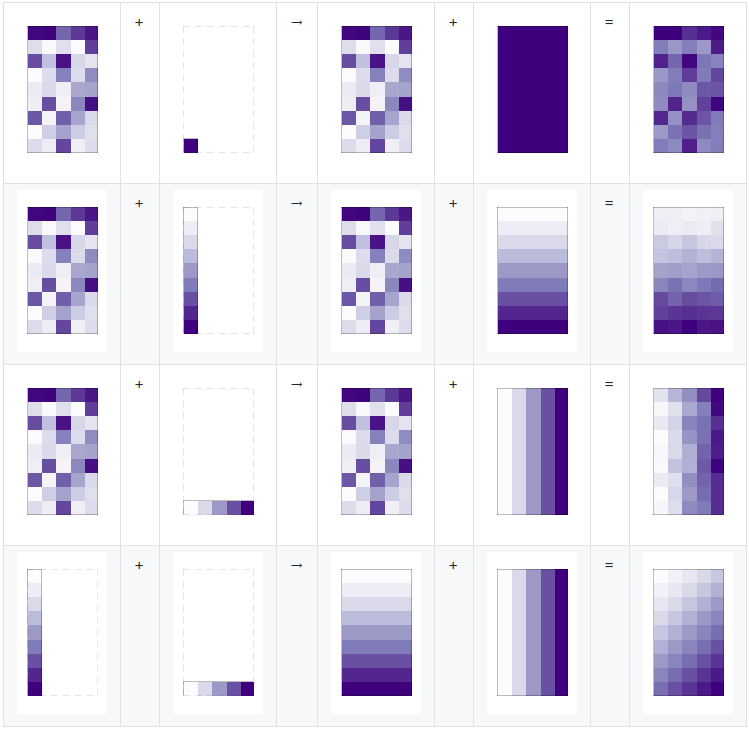

#### 布尔运算 筛选

In [499]:
a>90

array([False, False,  True,  True])

常用：大小判断作为筛选

In [502]:
a

array([ 60,  90, 120, 150])

In [501]:
a[a>90] # 其实是用布尔元素的array作为索引

array([120, 150])

In [503]:
a[a>90]=0  # 接着就可以处理这些筛选出的元素
a

array([60, 90,  0,  0])

In [510]:
a[a==90]=0  # 所有布尔表达式 都可以
a

array([60,  0,  0,  0])

有个大胆的想法 用自定义函数来判断

In [507]:
def foo(elem):
    if elem >90:
        return True
    else:
        return False
    
a[foo(a)]  # 这样是不可以的 自己写的函数 不能处理array的逐个元素 这不是filter

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

any和all

In [511]:
arr1 = np.array([0,1,2,3])
print(arr1.any())   # True
print(arr1.all())  

True
False


非零提取

In [666]:
a = np.array([[3, 0, 0], [0, 4, 0], [5, 6, 0]])
a

array([[3, 0, 0],
       [0, 4, 0],
       [5, 6, 0]])

nonzero返回两组坐标 x坐标（第一维度）和y坐标（第二维度）

In [667]:
np.nonzero(a)

(array([0, 1, 2, 2], dtype=int64), array([0, 1, 0, 1], dtype=int64))

也可以用来筛选

In [668]:
a[np.nonzero(a)]

array([3, 4, 5, 6])

换句话说 可以这么筛选索引：

In [671]:
a[[1,1,2,2],[0,0,1,1]]  # 每一个维度坐标各自写一个list

array([0, 0, 6, 6])

where

In [681]:
a = np.arange(10)
np.where(a < 5, a-2, 10*a)  #符合条件的 一个操作a-2 不符合条件的 另一个操作10*a

array([-2, -1,  0,  1,  2, 50, 60, 70, 80, 90])

#### 三种乘法

In [464]:
A = np.array( [[1,1], [0,1]] )
B = np.array( [[0,1], [1,1]] )

逐元素乘法

In [465]:
A * B  # elementwise 

array([[0, 1],
       [0, 1]])

矩阵乘法

In [466]:
A @ B # matrix product

array([[1, 2],
       [1, 1]])

In [467]:
A.dot(B)   # matrix product

array([[1, 2],
       [1, 1]])

In [468]:
np.dot(A,B)   # matrix product

array([[1, 2],
       [1, 1]])

向量内积

In [476]:
A = np.arange(5)
B = np.arange(5)+5

In [477]:
A*B  # 逐元素乘法

array([ 0,  6, 14, 24, 36])

In [480]:
np.dot(A,B)  # 同方向向量用dot方法 则得到内积 如果一个行向量一个列向量 就是前面的广播

80

#### floor ceil 取整运算

In [513]:
a=np.array([1.5,1.2,-1.4,-3.-2.1,1.9,2.9])
np.ceil(a)

array([ 2.,  2., -1., -5.,  2.,  3.])

还有ceil和round 不赘述

#### 排序 最值 求和

默认按照最后一维排序

In [604]:
a = np.random.randint(0,9,(8,8))
np.sort(a)   

array([[0, 3, 4, 4, 5, 5, 6, 7],
       [0, 0, 1, 3, 4, 4, 5, 7],
       [3, 3, 4, 4, 4, 5, 6, 8],
       [1, 2, 3, 4, 5, 6, 7, 7],
       [1, 3, 3, 4, 5, 6, 6, 8],
       [2, 3, 3, 3, 3, 4, 5, 8],
       [0, 1, 2, 2, 4, 4, 8, 8],
       [3, 5, 6, 6, 7, 7, 7, 7]])

摊平了排序

In [605]:
np.sort(a, axis=None)  

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8])

在第一维度排序

In [606]:
np.sort(a, axis=0)  

array([[0, 0, 1, 0, 1, 2, 0, 1],
       [1, 2, 3, 2, 3, 3, 3, 2],
       [3, 3, 4, 3, 4, 3, 3, 3],
       [3, 4, 5, 3, 4, 4, 4, 4],
       [4, 5, 5, 4, 5, 4, 4, 5],
       [5, 6, 7, 5, 7, 4, 6, 6],
       [6, 7, 8, 7, 8, 5, 6, 6],
       [7, 8, 8, 7, 8, 6, 7, 7]])

array 单维度最值 argmax argmin

In [611]:
a = np.random.randint(0,9,(1,12)).reshape(3,4)
a

array([[0, 8, 2, 8],
       [3, 5, 0, 5],
       [2, 4, 3, 1]])

In [612]:
np.argmax(a, axis=0)  # 在第一维度求最大值 

array([1, 0, 2, 0], dtype=int64)

其他的类推

array整体最值 max min

In [615]:
np.max(a)

8

两个array比较最值 maximum  minimum

In [683]:
np.maximum([2, 3, 4], [1, 5, 2])

array([2, 5, 4])

In [684]:
np.maximum(np.eye(2), [0.5, 2])   # 广播特性

array([[1. , 2. ],
       [0.5, 2. ]])

In [687]:
a = np.arange(5).reshape(5,1)
a

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [689]:
b = np.ones(9,dtype=int)
b

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [690]:
a*b

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4]])

In [693]:
np.maximum(a*b,2)

array([[2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4]])

array整体求和

In [613]:
a = np.random.randint(0,9,(1,12)).reshape(3,4)
a

array([[5, 3, 6, 4],
       [1, 8, 0, 4],
       [8, 3, 3, 3]])

In [614]:
np.sum(a,axis=1)

array([18, 13, 17])

In [616]:
np.sum(a)

48

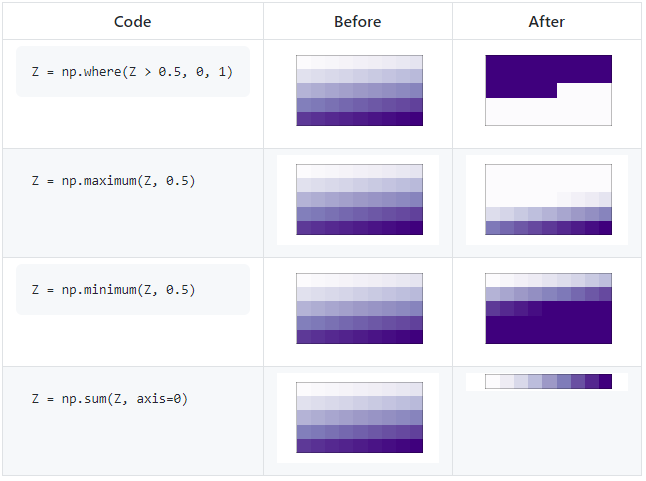

#### 深浅拷贝

浅拷贝

In [695]:
a = np.arange(15).reshape(3,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [696]:
b = a.view()
b

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [698]:
c = a[:,1:3]
c

array([[ 1,  2],
       [ 6,  7],
       [11, 12]])

b和c都是浅拷贝 view和切片都可以制造浅拷贝

In [699]:
b[:] = 1000
a

array([[   0, 1000, 1000,    3,    4],
       [   5, 1000, 1000,    8,    9],
       [  10, 1000, 1000,   13,   14]])

深拷贝 copy

In [700]:
a = np.arange(int(1e8))   # 巨大生成器
b = a[:100].copy() #切片时候是浅拷贝 copy时候深拷贝
del a #原来的占内存的巨大的a可以扔了

In [701]:
b

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

### array导入导出

#### 文本文件读取和存储

常用参数是：   
fname,  
dtype=,  
comments='#',   注释  
delimiter=None,  分隔符号   
skiprows=0,  跳过的行 0就是跳首行  
usecols=None,  指定用哪一列  
unpack=False,   如果unpack是True 最后会把usecols的每一列都单独输出一个array  

In [9]:
np.loadtxt('./source/numpytest.txt',delimiter=',')

array([[  1.,   2.,   3.,   4.,   5.],
       [  6.,   7.,   8.,   9.,  10.],
       [ 11.,  12.,  13.,  14.,  15.],
       [161., 171., 181.,  91., 110.]])

genfromtxt可以自动判断缺失值等等 比loadtxt稍微慢一些 但是管用

In [10]:
np.genfromtxt('./source/numpytest.txt',delimiter=',')

array([[  1.,   2.,   3.,   4.,   5.],
       [  6.,   7.,   8.,   9.,  10.],
       [ 11.,  12.,  13.,  14.,  15.],
       [161., 171., 181.,  91., 110.]])

In [11]:
np.loadtxt('./source/numpytest1.txt',delimiter=',')

ValueError: could not convert string to float: ''

In [13]:
arr = np.genfromtxt('./source/numpytest1.txt',delimiter=',')
arr

array([[  1.,   2.,   3.,   4.,   5.],
       [  6.,   7.,   8.,   9.,  10.],
       [ 11.,  12.,  nan,  14.,  15.],
       [161., 171., 181.,  91., 110.]])

保存文本

In [14]:
np.savetxt('./source/numpytest2.txt',arr,delimiter=' ')

#### 暗暗果实nan 和宿敌inf

python内置的nan和inf

In [22]:
float('nan')

nan

In [23]:
float('-inf')

-inf

numpy也有nan和inf

In [24]:
np.nan

nan

In [27]:
-np.inf

-inf

nan是一个特殊的float 代表缺失数据

In [17]:
type(np.nan )

float

空还不等于空 哲学啊 有时候用a！=a来找到这些空值

In [18]:
np.nan == np.nan

False

inf Inf INF  ±无穷

In [21]:
type(np.inf)

float

In [30]:
np.inf == float('inf')  # True

True

In [32]:
np.inf/-1

-inf

In [42]:
0/np.inf

0.0

In [44]:
0*np.inf  # 有点费解 你又让人家无限 又让人家归零 恕不奉陪了换你个nan

nan

黑暗果实吞噬一切恶魔果实  
nan的运算不管怎么都是nan 比较不管怎么都是false

In [33]:
np.nan*np.inf

nan

In [34]:
np.nan+np.inf

nan

In [36]:
np.nan/np.inf

nan

In [37]:
np.inf*np.nan

nan

In [38]:
np.inf/np.nan

nan

In [39]:
np.nan < np.inf

False

In [40]:
np.nan == np.nan  # 是不是忽然明白了为啥这个是false

False

所以来个没啥意思的测试：

In [46]:
0 / float('inf') == 0 * -np.inf

False

### 扩展1：康威生命机 致敬
https://github.com/rougier/numpy-tutorial 

### 扩展2：曼德勃罗集

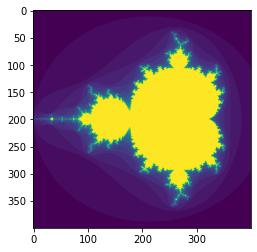

In [621]:
def mandelbrot( h,w, maxit=30 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2         # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much

    return divtime

plt.imshow(mandelbrot(400,400))